In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [14]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

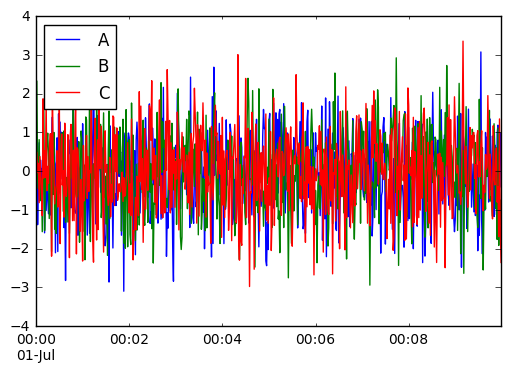

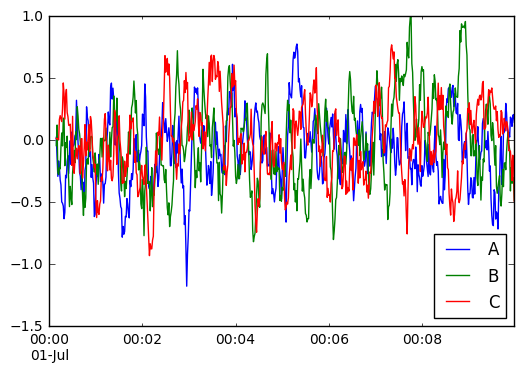

In [17]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot()
r.mean().plot()

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\lab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=15,min_periods=2,adjust=True).mean()
  from ipykernel import kernelapp as app


A         B         C
2016-07-01 00:00:01  0.816132 -0.712051  0.708298
2016-07-01 00:00:02  0.245424 -0.601836  0.601629
2016-07-01 00:00:03  0.215437 -0.361878  0.480723
2016-07-01 00:00:04  0.111280 -0.228451  0.560992
2016-07-01 00:00:05  0.290347 -0.296966  0.138485
2016-07-01 00:00:06  0.048994 -0.533345  0.315015
2016-07-01 00:00:07 -0.191896 -0.512348  0.496908
2016-07-01 00:00:08 -0.269570 -0.560326  0.343832
2016-07-01 00:00:09 -0.176414 -0.344983  0.228046

In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

A         B         C         D
2016-06-06  1.245913  0.165257  0.667181  1.155759
2016-06-07  0.282686 -0.548011  0.826395 -0.136334
2016-06-08 -0.999824  0.027689 -0.066105  0.146428
2016-06-09 -0.785385 -0.317407 -0.538023  0.050440
2016-06-10  0.691144 -0.535221  0.427661 -1.111450

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A8E3CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ADA67F0>], dtype=object)

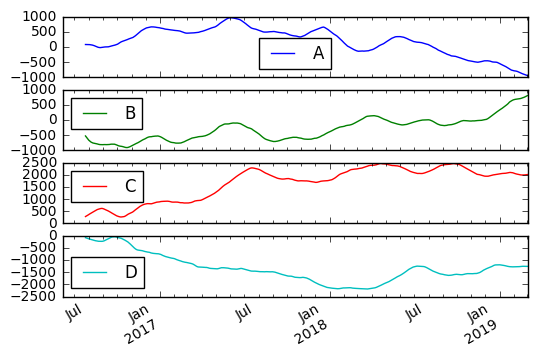

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

A         B         C         D
2016-06-06       NaN       NaN       NaN       NaN
2016-06-07       NaN       NaN       NaN       NaN
2016-06-08       NaN       NaN       NaN       NaN
2016-06-09       NaN       NaN       NaN       NaN
2016-06-10       NaN       NaN       NaN       NaN
2016-06-11       NaN       NaN       NaN       NaN
2016-06-12       NaN       NaN       NaN       NaN
2016-06-13       NaN       NaN       NaN       NaN
2016-06-14       NaN       NaN       NaN       NaN
2016-06-15  1.018263  1.479385  0.941684  0.564001
2016-06-16  1.005864  1.813818  0.940286  0.586044
2016-06-17  1.169315  2.170845  0.976888  0.566907
2016-06-18  1.060548  2.357512  1.021519  0.504677
2016-06-19  0.896466  2.347087  1.036645  0.437750
2016-06-20  0.752559  2.351757  1.056585  0.448242
2016-06-21  0.518076  1.974577  0.884293  0.436777
2016-06-22  0.510406  1.719465  0.710926  0.489837
2016-06-23  0.491708  1.639235  0.631871  0.486320
2016-06-24  0.558124  1.659846  0.591248  0.527310
2016-06-25  0.533609  1.682222  0.557589  0.602087
2016-06-26  0.600344  1.760140  0.414102  0.687265
2016-06-27  0.506178  1.669764  0.380923  0.825592
2016-06-28  0.515841  1.673895  0.334884  0.983595
2016-06-29  0.561507  1.627187  0.383218  0.998624
2016-06-30  0.548485  1.223463  0.454532  1.000945
2016-07-01  0.546386  0.855428  0.521630  0.990549
2016-07-02  0.591308  0.732063  0.697545  0.881333
2016-07-03  0.628536  0.776254  0.773499  0.944202
2016-07-04  0.526673  0.775923  0.736346  1.053195
2016-07-05  0.519357  0.704731  0.982445  1.040032
...              ...       ...       ...       ...
2019-02-01  0.465380  0.717044  0.606298  1.087484
2019-02-02  0.422485  0.848408  0.529063  1.179867
2019-02-03  0.506704  0.947189  0.559236  1.207541
2019-02-04  0.439053  1.108219  0.549441  1.105780
2019-02-05  0.438738  1.106684  0.579792  1.014554
2019-02-06  0.389841  0.882096  0.500080  0.840268
2019-02-07  0.432353  0.614239  0.501140  0.934036
2019-02-08  0.408393  0.408794  0.432076  1.174543
2019-02-09  0.623904  0.259769  0.514226  1.603588
2019-02-10  1.007661  0.380018  0.512100  1.838689
2019-02-11  1.282179  0.480047  0.514317  1.826598
2019-02-12  1.601454  0.485569  0.574724  1.564446
2019-02-13  1.901645  0.593147  0.564195  1.312841
2019-02-14  1.843992  0.729348  0.763207  1.019409
2019-02-15  1.681805  0.884403  0.907161  0.633996
2019-02-16  1.511642  1.187727  1.156720  0.507859
2019-02-17  1.266380  1.424427  1.471265  0.638031
2019-02-18  1.109109  1.674342  1.680292  0.690582
2019-02-19  1.117374  1.691585  1.657577  0.839388
2019-02-20  1.045447  1.712715  1.558851  0.807284
2019-02-21  1.024054  1.494704  1.433425  0.713580
2019-02-22  0.991506  1.134224  1.464305  0.670028
2019-02-23  1.026040  0.877626  1.060196  0.711845
2019-02-24  1.121913  0.721644  0.934534  0.566343
2019-02-25  1.157223  0.633504  0.618394  0.446200
2019-02-26  1.102750  0.803473  0.416134  0.544112
2019-02-27  0.991238  1.093476  0.456666  0.647377
2019-02-28  0.857159  1.286340  0.560152  0.672895
2019-03-01  0.724816  1.280700  0.679087  0.816567
2019-03-02  0.807596  1.270919  0.692280  0.970495

[1000 rows x 4 columns]

In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

A         B         C         D
2016-06-07  1.387256 -0.108748  1.080379  1.087592
2016-06-08  1.101096 -0.190854  1.196076  1.113679
2016-06-09  0.761669 -0.311258  1.119419  1.139332
2016-06-10  0.696242 -0.490545  1.158957  0.932434

In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
## Rolling window is interested in data as it comes in chuncks, for example a small buisness owner 
## wants to know how the business is doing from one week to the next. An expanding window
## always uses all the information you have and all of it is equally important and you are looking 
## at how all the information is changing over time 
## an expanding window will only pick up drastic changes and will notice them with a greater latency 
## than a rolling window in which the more recent events are given more weight than past data. 

In [ ]:
# EWMA
# Why use EWMA?
## is a statistic for monitoring the process that averages the data 
##in a way that gives less and less weight to data as they are further removed in time